In [1]:
#%matplotlib nbagg

In [1]:
import numpy
import matplotlib.pyplot as plt

import sys

sys.path.append('../sidpy')

from sidpy import *

from mpl_toolkits.mplot3d import Axes3D

import matplotlib
import matplotlib.cm as cmx
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size = 18)

In [2]:
p_max = 10
is_multirealization = False

In [3]:
x = numpy.loadtxt('../example-data/data-shenon/y.dat', delimiter = ',')[:10000, 0]
y = numpy.loadtxt('../example-data/data-shenon/x.dat', delimiter = ',')[:10000, 0]

#x = numpy.loadtxt('../example-data/data-shenon/x.dat', delimiter = ',')[:1000, 0]
#y = numpy.loadtxt('../example-data/data-shenon/y.dat', delimiter = ',')[:1000, 0]

#x = numpy.loadtxt('../example-data/data-shenon-switching/y.dat', delimiter = ',')[:, 0]
#y = numpy.loadtxt('../example-data/data-shenon-switching/x.dat', delimiter = ',')[:, 0]

#x = numpy.loadtxt('../example-data/data-shenon-switching/x.dat', delimiter = ',')[:, 0]
#y = numpy.loadtxt('../example-data/data-shenon-switching/y.dat', delimiter = ',')[:, 0]

# x = x.reshape(1, -1)
# y = y.reshape(1, -1)

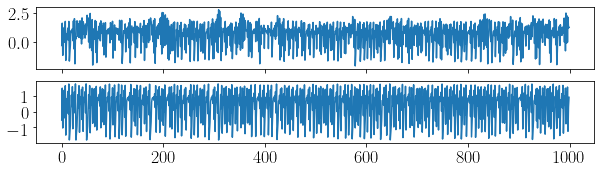

In [4]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize = (10, 2.5))

ax[0].plot(x[:1000])
ax[1].plot(y[:1000])

In [5]:
p_max = 10

print('Choosing p* for the SPO framework:')
p_opt_o, mse_opt, mse_by_p, kstar_by_p = choose_model_order_mse(x, p_max, pow_upperbound = 0.5, nn_package = 'sklearn', is_multirealization = is_multirealization, announce_stages = False, output_verbose = False)

print('\nChose p* = {}...'.format(p_opt_o))

print('Choosing q* in the SPO framework:')
q_opt_spo, p_opt_spo, mse_opt, mse_by_qp, kstar_by_qp = choose_model_order_io_mse(y, x, q_max = p_max, p_fix = p_opt_o, pow_upperbound = 0.5, nn_package = 'sklearn', is_multirealization = is_multirealization, announce_stages = False, output_verbose = False)

print('\nChose (q* = {}, p* = {})...'.format(q_opt_spo, p_opt_spo))

print('Choosing q* outside the SPO framework:')
q_opt_iopo, p_opt_iopo, mse_opt, mse_by_qp, kstar_by_qp = choose_model_order_io_mse(y, x, q_max = p_max, p_fix = None, p_max = p_max, pow_upperbound = 0.5, nn_package = 'sklearn', is_multirealization = is_multirealization, announce_stages = False, output_verbose = False)

#p_opt, nlpl_opt, nlpl_by_p = choose_model_order_nlpl(x, p_max, pow_upperbound = 0.5, nn_package = 'sklearn', is_multirealization = is_multirealization, announce_stages = False, output_verbose = True)

print('\nChose (q* = {}, p* = {})...'.format(q_opt_iopo, p_opt_iopo))

Choosing p* for the SPO framework:
####################################################
# Warning: For p = 1, Nelder-Mead is choosing k* near k_upper = 100.
# Increase pow_upperbound.
####################################################

Chose p* = 5...
Choosing q* in the SPO framework:

Chose (q* = 3, p* = 5)...
Choosing q* outside the SPO framework:
For (q = 0, p = 0) with MSE(k*) = 1.2315573682243004
####################################################
# Warning: For (q = 1, p = 0), Nelder-Mead is choosing k* near k_upper = 100.
# Increase pow_upperbound.
####################################################
####################################################
# Warning: For (q = 0, p = 1), Nelder-Mead is choosing k* near k_upper = 100.
# Increase pow_upperbound.
####################################################

Chose (q* = 1, p* = 2)...


In [7]:
print('\n\nFor  SPO: (q* = {}, p* = {})\nFor IOPO: (q* = {}, p_io* = {}, p_o* = {})'.format(q_opt_spo, p_opt_o, q_opt_iopo, p_opt_iopo, p_opt_o))



For  SPO: (q* = 3, p* = 5)
For IOPO: (q* = 1, p_io* = 2, p_o* = 5)


In [6]:
p = p_opt_o
q = q_opt_spo
delay = 0

if q == 0:
    lTEs = numpy.zeros(y.shape)
    TE = 0
else:
    lTEs, TE = estimate_lte(y, x, q, p, delay, k = 5)

# estimate_lte_iopo(y, x, q, p_io, p_o, delay, k = 5):

lTEs_iopo, TE_iopo = estimate_lte_iopo(y, x, q_opt_iopo, p_opt_iopo, p_opt_o, delay, k = 5)

print('The estimated Total Transfer Entropy is {} (SPO) and {} (IOPO)'.format(TE, TE_iopo))

/Users/daviddarmon/opt/anaconda3/lib/python3.7/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


The estimated Total Transfer Entropy is 0.38922700065983756 (SPO) and 1.4201774893845756 (IOPO)


In [9]:
q = q_opt_spo

sTEs = estimate_ste(y, x, q, p, delay, lTEs, pow_neighbors = 0.50, verbose = False)

sTEs_iopo = estimate_ste_iopo(y, x, q_opt_iopo, p_opt_iopo, p_opt_o, delay, lTEs_iopo, pow_neighbors = 0.5, verbose = False)

(-0.10457339558405601, 3.6600463666559184)

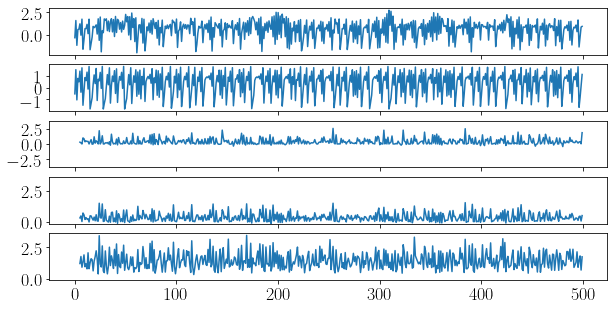

In [10]:
fig, ax = plt.subplots(5, 1, sharex = True, figsize = (10, 5))

plot_to = 500

ax[0].plot(x[:plot_to])
ax[1].plot(y[:plot_to])
ax[2].plot(lTEs[:plot_to])
ax[2].set_ylim([-4, 4])
ax[3].plot(sTEs[:plot_to])
ax[4].plot(sTEs_iopo[:plot_to])
y_range = [numpy.nanmin([sTEs, sTEs_iopo]), numpy.nanmax([sTEs, sTEs_iopo])]
ax[3].set_ylim(y_range)
ax[4].set_ylim(y_range)
#ax[3].set_ylim([-1, 1])

# For switching example.
# fig, ax = plt.subplots(4, 1, sharex = True, figsize = (10, 5))
# ax[0].plot(x[40000-plot_to/2:40000+plot_to/2])
# ax[1].plot(y[40000-plot_to/2:40000+plot_to/2])
# ax[2].plot(lTEs[40000-plot_to/2:40000+plot_to/2])
# ax[2].set_ylim([-4, 4])
# ax[3].plot(sTEs[40000-plot_to/2:40000+plot_to/2])
# ax[3].set_ylim([-1, 1])